# [phitar](https://jangcom.github.io/phitar/): Testing of the e-type = 2 source subsection

by J. Jang

* Last: 2020-06-06
* First: 2020-04-27

## Introduction

Options for setting source energy distributions will be added to phitar v1.04. One of the options is a Gaussian energy distribution setter that uses the e-type = 2 subsection of PHITS. Before beginning the update, here we examine if the e-type = 2 subsection leads to equivalent results of the e0 command used until phitar v1.03. In addition, whether the e-type = 2 can be used as the e0 command, in which case the former can completely replace the latter, is also tested.

In [1]:
import re
import subprocess
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from IPython.display import set_matplotlib_formats
from IPython.display import SVG

In [2]:
# I/O
out_path = './out'  # Outbound
phitar_fig_path = '../../../figs'  # Inbound
phits_path = '../phits'

# pandas
flue_header = ['Energy (MeV)', 'Monte Carlo fluence (cm$^{-2}$ source$^{-1}$)']

# MPL
mpl.rcParams.update({'font.sans-serif': 'Arial',
                     'pdf.fonttype': 42})
plt.style.use('bmh')
xlabpad = 15
ylabpad = 15

# IPython.display
set_matplotlib_formats('svg')

In [3]:
def disp_rows_of_int(lines, rows, rows_of_int):
    """Display the rows of interest of a PHITS input file."""
    for i in range(len(lines)):
        for row in rows_of_int:
            if i in rows[row]['range']:
                if i == rows[row]['range'][0]:
                    print(rows[row]['header'])
                print(lines[i])

In [4]:
def save_curr_fig(out_bname, out_path=out_path):
    """Save a figure in multiple formats."""
    out_bname_full = '{}/{}'.format(out_path, out_bname)
    for fmt in ['pdf', 'svg']:
        plt.savefig('{}.{}'.format(out_bname_full, fmt), bbox_inches='tight')
    rtn = subprocess.run('inkscape {}.svg -M {}.emf'.format(out_bname_full, out_bname_full))

In [5]:
def plot_flue(ax, xdata, ydata,
              xmin=30, xmax=40,
              clr='r', mrk='o', ls='None', lab='e0', loc=0):
    """Plot particle fluence against energy."""
    ax.set_xlim(xmin, xmax)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(axis='both', which='major', direction='in', length=5)
    ax.tick_params(axis='both', which='minor', direction='in', length=3)
    ax.set_xlabel(flue_header[0], labelpad=xlabpad)
    ax.set_ylabel(flue_header[1], labelpad=ylabpad)
    ax.plot(xdata, ydata, color=clr, marker=mrk, linestyle=ls, label=lab)
    ax.legend(loc=loc)

## Comparison using T-Cross tallies

### Geometry and tally settings

Part of a PHITS input file 'geom.inp'

In [6]:
# I/O
f = '{}/geom.inp'.format(phits_path)
fh = open(f)
lines = [v.rstrip() for v in fh]
fh.close()

rows = {
    'params': {
        'header': '',
        'range': [22, 23],
    },
    't_cross': {
        'header': '',
        'range': range(175, 200),
    },
    't_gshow': {
        'header': '',
        'range': [203, 218, 223],
    },
}
rows_of_int = [
    'params',
    't_cross',
    't_gshow',
]

disp_rows_of_int(lines, rows, rows_of_int)


[Parameters]
icntl    =      7 $ [0] MC run [7] Gshow [11] 3Dshow

[T-Cross]
mesh   =  r-z
r-type =    2
nr     =    1
rmin   =    0.00000
rmax   =    1.25000
z-type =    2
nz     =    1
zmin   =    -4.000000100000
zmax   =    -4.000000000000
e-type =    2
ne     = 1000
emin   =    0 $ Mo-100(g,n)Mo-99 threshold
emax   =   c1 + 5
part   = electron photon
axis   =  eng
file   = geom-cross-eng-intact.ang
unit   =    1
factor =    1
title  = Energy spectra of intact electron beams
epsout =    1
angel  = land ymin(1e-05) ymax(0.1) nofr noms cmmm
sangel =    1
         'W thickness: 2.58 mm'
output = flux

[T-Gshow]
file   = geom-gshow-xz.ang
epsout =    1


Run the PHITS input file with icntl = 7 and obtain a G-Show file.

In [7]:
!phits ../phits/geom.inp

Started at  2020/06/06 13:57:01.78, input= "geom.inp" 
 icntl = 7: Draw geometry by [t-gshow]

 ANGEL         Graphic Program Version  4.50
 Copyright (C) Koji NIITA  1993-2005. All rights reserved.

Finished at 2020/06/06 13:57:09.05


Obtain a descriptive figure by decorating the G-Show file.

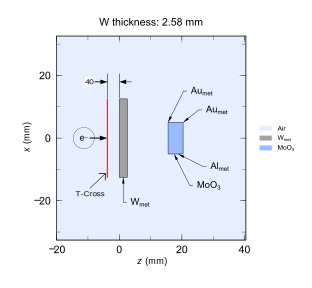

In [8]:
SVG(filename='{}/etype2.svg'.format(phitar_fig_path))

* Electron beams begin propagation at z = -50 mm
  toward the +z direction with an incidence angle of 0 deg.
* The energy spectra of "intact" electron beams are measured
  by using a T-Cross tally placed at an "ambient" virtual plane at z = -40 mm.
* The T-Cross tally output is set to be "flux",
  but is equivalent to "current" because the incidence angle is 0 deg
  (p. 210, PHITS v3.02 JP man).

### Monoenergetic

Part of a PHITS input file 'e0.inp'

In [9]:
# I/O
f = '{}/e0.inp'.format(phits_path)
fh = open(f)
lines = [v.rstrip() for v in fh]
fh.close()

rows = {
    'params': {
        'header': '',
        'range': [22, 23],
    },
    'source': {
        'header': '',
        'range': range(47, 58),
    },
}
rows_of_int = [
    'params',
    'source',
]

disp_rows_of_int(lines, rows, rows_of_int)


[Parameters]
icntl    =      0 $ [0] MC run [7] Gshow [11] 3Dshow

[Source]
s-type =        3 $ Gaussian distribution in xyz dirs
proj   = electron $ Projectile
e0     =       c1 $ Monoenergetic
x0     =        0 $ x-center of Gaussian
x1     =  1.05975 $ x-FWHM of Gaussian
y0     =        0 $ y-center of Gaussian
y1     =  0.77715 $ y-FWHM of Gaussian
z0     =       -5 $ z-center of Gaussian
z1     =      0.0 $ z-FWHM of Gaussian
dir    =        1 $ z-axis angle in arccosine


Run the PHITS input with icntl = 0.

In [10]:
!phits ../phits/e0.inp

Started at  2020/06/06 13:57:09.87, input= "e0.inp" 
OpenMP PARALLEL PROCESS   1/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   3/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   2/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   4/   4  @ IP(MPI)=    0
bat[       1] ncas =           1000. : date = 2020-06-06 : time = 13h 57m 29
OpenMP FINALIZE   3/   4  @ IP(MPI)=    0
OpenMP FINALIZE   2/   4  @ IP(MPI)=    0
OpenMP FINALIZE   1/   4  @ IP(MPI)=    0
OpenMP FINALIZE   4/   4  @ IP(MPI)=    0

 ANGEL         Graphic Program Version  4.50
 Copyright (C) Koji NIITA  1993-2005. All rights reserved.

Finished at 2020/06/06 13:57:31.41


Check the T-Cross result.

In [11]:
t_cross_bname_full = '{}/e0-cross-eng-intact'.format(phits_path)
t_cross = '{}.ang'.format(t_cross_bname_full)
t_cross_trimmed = '{}_trimmed.ang'.format(t_cross_bname_full)

In [12]:
# Read in the T-Cross result file.
t_cross_fh = open(t_cross)
t_cross_lines = [v for v in t_cross_fh]
t_cross_fh.close()

In [13]:
# Retrieve only the data part and write them to a file.
data_rows = range(251, 1252)
t_cross_data = [t_cross_lines[v] for v in data_rows]
t_cross_data[0] = re.sub('#(.*)', ' \\1', t_cross_data[0])
t_cross_trimmed_fh = open(t_cross_trimmed, 'w')
for line in t_cross_data:
    t_cross_trimmed_fh.write(line)
t_cross_trimmed_fh.close()

In [14]:
df = pd.read_csv(t_cross_trimmed, sep=r'\s+')
df

,e-lower,e-upper,electron,r.err,photon,r.err.1
0,0.00,0.04,0.0,0.0,0.000204,1.0
1,0.04,0.08,0.0,0.0,0.000205,1.0
2,0.08,0.12,0.0,0.0,0.000000,0.0
3,0.12,0.16,0.0,0.0,0.000000,0.0
4,0.16,0.20,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...
995,39.80,39.84,0.0,0.0,0.000000,0.0
996,39.84,39.88,0.0,0.0,0.000000,0.0
997,39.88,39.92,0.0,0.0,0.000000,0.0
998,39.92,39.96,0.0,0.0,0.000000,0.0


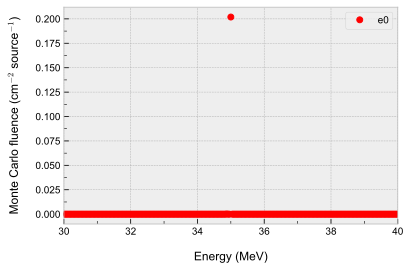

In [15]:
plot_flue(plt.subplot(), df.loc[:, 'e-upper'], df.loc[:, 'electron'])
save_curr_fig('e0')

The total electron fluence is

In [16]:
tot_elec_flue = df.electron.sum()
print('{:.3f} cm^-2 source-^1'.format(tot_elec_flue))

0.203 cm^-2 source-^1


The T-Cross area is

In [17]:
t_cross_area = (t_cross_lines[1263].split())[2]
t_cross_area = float(t_cross_area)
print('{} cm^2'.format(t_cross_area))

4.9087 cm^2


Multiplying the two fluence by the t-cross area gives

In [18]:
tot_elec_flue * t_cross_area

0.994076446666

which is almost equal to 1. This means that the fluence had been calculated as the number of particles passed through the T-Cross area divided by the T-Cross area:

In [19]:
the_tot_elec_flue = 1 / t_cross_area
print('{:.3f} cm^-2 source^-1'.format(the_tot_elec_flue))

0.204 cm^-2 source^-1


We have just confirmed how the T-Cross tally is calculated (p. 210, PHITS v3.02 Jp man). Now, change the electron energy distribution from monoenergetic to Gaussian-energetic and, see the effect.

### Gaussian energy distribution

Part of a PHITS input file 'etype2.inp'

In [20]:
# I/O
f = '{}/etype2.inp'.format(phits_path)
fh = open(f)
lines = [v.rstrip() for v in fh]
fh.close()

rows = {
    'params': {
        'header': '',
        'range': [22, 23],
    },
    'source': {
        'header': '',
        'range': range(47, 56),
    },
}
rows_of_int = [
    'params',
    'source',
]

disp_rows_of_int(lines, rows, rows_of_int)


[Parameters]
icntl    =      0 $ [0] MC run [7] Gshow [11] 3Dshow

[Source]
s-type =        3 $ Gaussian distribution in xyz dirs
proj   = electron $ Projectile
$e0     =       c1 $ Monoenergetic
e-type =        2 $ Gaussian energy distribution
eg0    =       c1 $ Center
eg1    =        3 $ FWHM
eg2    =   c1 - 5 $ Cutoff, min
eg3    =   c1 + 5 $ Cutoff, max


Run the PHITS input with icntl = 0.

In [21]:
!phits ../phits/etype2.inp

Started at  2020/06/06 13:57:38.11, input= "etype2.inp" 
OpenMP PARALLEL PROCESS   1/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   4/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   2/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   3/   4  @ IP(MPI)=    0
bat[       1] ncas =           1000. : date = 2020-06-06 : time = 13h 57m 52
OpenMP FINALIZE   4/   4  @ IP(MPI)=    0
OpenMP FINALIZE   1/   4  @ IP(MPI)=    0
OpenMP FINALIZE   2/   4  @ IP(MPI)=    0
OpenMP FINALIZE   3/   4  @ IP(MPI)=    0

 ANGEL         Graphic Program Version  4.50
 Copyright (C) Koji NIITA  1993-2005. All rights reserved.

Finished at 2020/06/06 13:57:53.83


Check the T-Cross result.

In [22]:
t_cross_bname_full = '{}/etype2-cross-eng-intact'.format(phits_path)
t_cross = '{}.ang'.format(t_cross_bname_full)
t_cross_trimmed = '{}_trimmed.ang'.format(t_cross_bname_full)

In [23]:
# Read in the T-Cross result file.
t_cross_fh = open(t_cross)
t_cross_lines = [v for v in t_cross_fh]
t_cross_fh.close()

In [24]:
# Retrieve only the data part and write them to a file.
data_rows = range(251, 1252)
t_cross_data = [t_cross_lines[v] for v in data_rows]
t_cross_data[0] = re.sub('#(.*)', ' \\1', t_cross_data[0])
t_cross_trimmed_fh = open(t_cross_trimmed, 'w')
for line in t_cross_data:
    t_cross_trimmed_fh.write(line)
t_cross_trimmed_fh.close()

In [25]:
df2 = pd.read_csv(t_cross_trimmed, sep=r'\s+')
df2

,e-lower,e-upper,electron,r.err,photon,r.err.1
0,0.00,0.04,0.0,0.0,0.000000,0.0
1,0.04,0.08,0.0,0.0,0.000412,1.0
2,0.08,0.12,0.0,0.0,0.000000,0.0
3,0.12,0.16,0.0,0.0,0.000000,0.0
4,0.16,0.20,0.0,0.0,0.000424,1.0
...,...,...,...,...,...,...
995,39.80,39.84,0.0,0.0,0.000000,0.0
996,39.84,39.88,0.0,0.0,0.000000,0.0
997,39.88,39.92,0.0,0.0,0.000000,0.0
998,39.92,39.96,0.0,0.0,0.000000,0.0


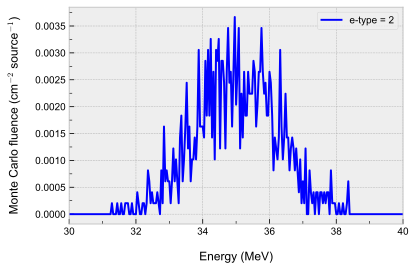

In [26]:
plot_flue(plt.subplot(), df2.loc[:, 'e-upper'], df2.loc[:, 'electron'],
          clr='b', mrk='None', ls='-', lab='e-type = 2')
save_curr_fig('etype2')

The total electron fluence is

In [27]:
tot_elec_flue = df2.electron.sum()
print('{:.3f} cm^-2 source-^1'.format(tot_elec_flue))

0.202 cm^-2 source-^1


which is almost the same as the monoenergetic one (see [Monoenergetic](#Monoenergetic)).

### Additional test: Use of e-type = 2 as e0

The main commands of the e-type = 2 subsection include (p. 100, PHITS v3.02 JP man)

* eg0: Center of Gaussian distribution (MeV)
* eg1: FWHM of Gaussian distribution (MeV)
* eg2: Minimum cutoff for Gaussian distribution (MeV)
* eg3: Maximum cutoff for Gaussian distribution (MeV)

One can guess that by setting eg1 = 0, the energy distribution would become monoenergetic, in which case the e-type = 2 can completely replace the e0 command.

Prepare a PHITS input file having e-type = 2 and eg1 = 0.

Part of a PHITS input file 'etype2_fwhm0.inp'

In [28]:
# I/O
f = '{}/etype2_fwhm0.inp'.format(phits_path)
fh = open(f)
lines = [v.rstrip() for v in fh]
fh.close()

rows = {
    'params': {
        'header': '',
        'range': [22, 23],
    },
    'source': {
        'header': '',
        'range': range(47, 63),
    },
}
rows_of_int = [
    'params',
    'source',
]

disp_rows_of_int(lines, rows, rows_of_int)


[Parameters]
icntl    =      0 $ [0] MC run [7] Gshow [11] 3Dshow

[Source]
s-type =        3 $ Gaussian distribution in xyz dirs
proj   = electron $ Projectile
$e0     =       c1 $ Monoenergetic
e-type =        2 $ Gaussian energy distribution
eg0    =       c1 $ Center
eg1    =        0 $ FWHM
eg2    =   c1 - 5 $ Cutoff, min
eg3    =   c1 + 5 $ Cutoff, max
x0     =        0 $ x-center of Gaussian
x1     =  1.05975 $ x-FWHM of Gaussian
y0     =        0 $ y-center of Gaussian
y1     =  0.77715 $ y-FWHM of Gaussian
z0     =       -5 $ z-center of Gaussian
z1     =      0.0 $ z-FWHM of Gaussian
dir    =        1 $ z-axis angle in arccosine


Run the PHITS input with icntl = 0.

In [29]:
!phits ../phits/etype2_fwhm0.inp

Started at  2020/06/06 13:58:00.70, input= "etype2_fwhm0.inp" 
OpenMP PARALLEL PROCESS   1/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   4/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   3/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   2/   4  @ IP(MPI)=    0
bat[       1] ncas =           1000. : date = 2020-06-06 : time = 13h 58m 19
OpenMP FINALIZE   1/   4  @ IP(MPI)=    0
OpenMP FINALIZE   4/   4  @ IP(MPI)=    0
OpenMP FINALIZE   2/   4  @ IP(MPI)=    0
OpenMP FINALIZE   3/   4  @ IP(MPI)=    0

 ANGEL         Graphic Program Version  4.50
 Copyright (C) Koji NIITA  1993-2005. All rights reserved.

Finished at 2020/06/06 13:58:21.39


Check the T-Cross result.

In [30]:
t_cross_bname_full = '{}/etype2_fwhm0-cross-eng-intact'.format(phits_path)
t_cross = '{}.ang'.format(t_cross_bname_full)
t_cross_trimmed = '{}_trimmed.ang'.format(t_cross_bname_full)

In [31]:
# Read in the T-Cross result file.
t_cross_fh = open(t_cross)
t_cross_lines = [v for v in t_cross_fh]
t_cross_fh.close()

In [32]:
# Retrieve only the data part and write them to a file.
data_rows = range(251, 1252)
t_cross_data = [t_cross_lines[v] for v in data_rows]
t_cross_data[0] = re.sub('#(.*)', ' \\1', t_cross_data[0])
t_cross_trimmed_fh = open(t_cross_trimmed, 'w')
for line in t_cross_data:
    t_cross_trimmed_fh.write(line)
t_cross_trimmed_fh.close()

In [33]:
df3 = pd.read_csv(t_cross_trimmed, sep=r'\s+')
df3

,e-lower,e-upper,electron,r.err,photon,r.err.1
0,0.00,0.04,0.0,0.0,0.000000,0.0
1,0.04,0.08,0.0,0.0,0.000411,1.0
2,0.08,0.12,0.0,0.0,0.000000,0.0
3,0.12,0.16,0.0,0.0,0.000000,0.0
4,0.16,0.20,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...
995,39.80,39.84,0.0,0.0,0.000000,0.0
996,39.84,39.88,0.0,0.0,0.000000,0.0
997,39.88,39.92,0.0,0.0,0.000000,0.0
998,39.92,39.96,0.0,0.0,0.000000,0.0


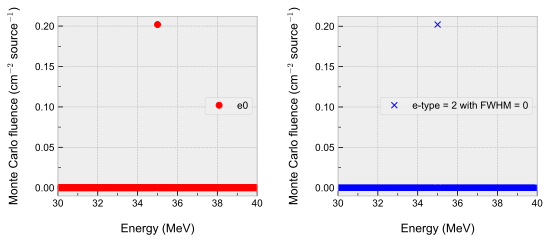

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5))
plot_flue(axs[0], df.loc[:, 'e-upper'], df.loc[:, 'electron'], loc=5)
plot_flue(axs[1], df3.loc[:, 'e-upper'], df3.loc[:, 'electron'],
          clr='b', mrk='x', ls='None', lab='e-type = 2 with FWHM = 0', loc=5)
fig.tight_layout(pad=1.5)
save_curr_fig('etype2_as_e0')

The total electron fluence is

In [35]:
tot_elec_flue = df3.electron.sum()
print('{:.3f} cm^-2 source-^1'.format(tot_elec_flue))

0.203 cm^-2 source-^1


which is exactly the same as the monoenergetic one (see [Monoenergetic](#Monoenergetic)).

## Summary

* In this test, the e-type = 2 subsection was compared with the e0 command.
* The obtained electron fluences were found to be equivalent.
* By setting the FWHM of Gaussian energy distribution (eg1), the e-type = 2 subsection can be used as the e0 command.